In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

# Load CIFARTile datasets from Google Drive
path = "/content/drive/MyDrive/CSC8111_Coursework/" # Change path to run program
train_x = np.load(path + "train_x.npy", allow_pickle=True)
train_y = np.load(path + "train_y.npy", allow_pickle=True)
test_x = np.load(path + "test_x.npy", allow_pickle=True)
test_y = np.load(path + "test_y.npy", allow_pickle=True)
valid_x = np.load(path + "valid_x.npy", allow_pickle=True)
valid_y = np.load(path + "valid_y.npy", allow_pickle=True)

Mounted at /content/drive


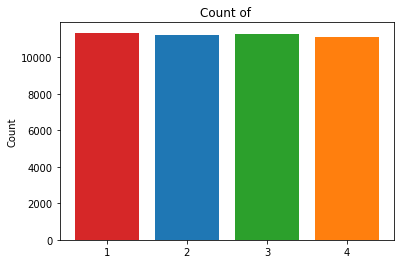

In [3]:
import matplotlib.pyplot as plt

# Get count for each label
y = []
for i in range(4):
  y.append(np.count_nonzero(train_y == i))
  i += 1

# Plot graph of label counts
fig, ax = plt.subplots()
labels = ["1", "2", "3", "4"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(labels, y, color=bar_colors)
ax.set_ylabel('Count')
ax.set_title('Count of ')

plt.show()

In [4]:
print("The Minimum value in train_x is: %4f" % train_x.min())
print("The Maximum value in train_x is: %4f" % train_x.max())

The Minimum value in train_x is: -1.989212
The Maximum value in train_x is: 2.126791


In [5]:
# Normalise pixel values to range of 0-1
def image_normalization(arr):
  return (arr - arr.min())/(arr.max()-arr.min())

In [6]:
# Reshape datasets to channel last
train_x = train_x.reshape(train_x.shape[0], 64, 64, 3)
test_x = test_x.reshape(test_x.shape[0], 64, 64, 3)
valid_x = valid_x.reshape(valid_x.shape[0], 64, 64, 3)

# Normalise pixel values
train_x = image_normalization(train_x)
test_x = image_normalization(test_x)
valid_x = image_normalization(valid_x)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential()
# First convolutional block
model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
# 64x64 --> 32x32
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second convolutional block
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
# 32x32 --> 16x16
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
# 16x16 --> 8x8
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fourth convolutional block
model.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
# 8x8 --> 4x4
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Decision layer
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        16448     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                        

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Stops training if 5 consecutive epochs don't improve on best previous accuracy
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model_output = model.fit(x=train_x, y=train_y, epochs=50, validation_data=(valid_x, valid_y), callbacks=[es])
model.evaluate(test_x, test_y)

Epoch 1/50
1407/1407 [==============================] - 73s 45ms/step - loss: 1.5305 - accuracy: 0.2640 - val_loss: 1.6513 - val_accuracy: 0.2419
Epoch 2/50
1407/1407 [==============================] - 65s 46ms/step - loss: 1.3482 - accuracy: 0.3302 - val_loss: 1.3377 - val_accuracy: 0.3373
Epoch 3/50
1407/1407 [==============================] - 65s 46ms/step - loss: 1.3004 - accuracy: 0.3618 - val_loss: 1.3225 - val_accuracy: 0.3377
Epoch 4/50
1407/1407 [==============================] - 66s 47ms/step - loss: 1.2696 - accuracy: 0.3828 - val_loss: 1.3539 - val_accuracy: 0.3727
Epoch 5/50
1407/1407 [==============================] - 66s 47ms/step - loss: 1.2402 - accuracy: 0.3978 - val_loss: 1.2856 - val_accuracy: 0.3731
Epoch 6/50
1407/1407 [==============================] - 67s 48ms/step - loss: 1.2124 - accuracy: 0.4173 - val_loss: 1.2816 - val_accuracy: 0.4057
Epoch 7/50
1407/1407 [==============================] - 67s 48ms/step - loss: 1.1814 - accuracy: 0.4308 - val_loss: 1.7490 -

[1.1179591417312622, 0.4957999885082245]

In [ ]:
from sklearn.metrics import classification_report

# Get predictions from model
pred_y = np.array(model.predict(test_x))

# Get the chosen label for each prediction
predicted_label = []
for prediction in pred_y:
  predicted_label.append(np.argmax(prediction))

# Print precision, recall and f1-score for each label
print(classification_report(test_y, predicted_label))

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.54      0.91      0.68      2443
           1       0.43      0.45      0.44      2602
           2       0.44      0.14      0.22      2473
           3       0.51      0.48      0.50      2482

    accuracy                           0.50     10000
   macro avg       0.48      0.50      0.46     10000
weighted avg       0.48      0.50      0.46     10000



In [ ]:
# Get count of each label in test dataset
test_count = []
for i in range(4):
  test_count.append(np.count_nonzero(test_y == i))
  i += 1

# Get count of each label in model predictions
predicted_label = np.array(predicted_label)
pred_count = []
for i in range(4):
  pred_count.append(np.count_nonzero(predicted_label == i))
  i += 1

print("Test Dataset")
print(" 0: %d\n 1: %d\n 2: %d\n 3: %d" % 
      (test_count[0], test_count[1], test_count[2], test_count[3]))
print("Model Prediction")
print(" 0: %d\n 1: %d\n 2: %d\n 3: %d" % 
      (pred_count[0], pred_count[1], pred_count[2], pred_count[3]))

Test Dataset
 0: 2443
 1: 2602
 2: 2473
 3: 2482
Model Prediction
 0: 4112
 1: 2730
 2: 809
 3: 2349


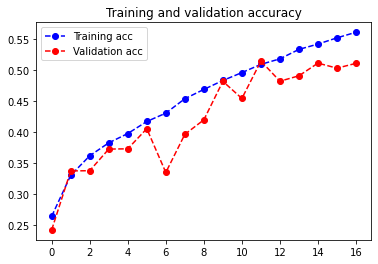

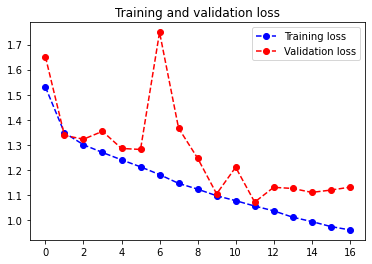

In [ ]:
acc = model_output.history['accuracy']
val_acc = model_output.history['val_accuracy']
loss = model_output.history['loss']
val_loss = model_output.history['val_loss']

epochs = range(len(acc))

# Displays a plot of the training accuracy and validation accuracy over each epoch
plt.plot(epochs, acc, 'bo--', label='Training acc')
plt.plot(epochs, val_acc, 'ro--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Displays a plot of the training loss and validation loss over each epoch
plt.plot(epochs, loss, 'bo--', label='Training loss')
plt.plot(epochs, val_loss, 'ro--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()